# Quantum World

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.quantum_info import entanglement_of_formation, entropy, Statevector, DensityMatrix, partial_trace, purity
from qiskit.visualization import array_to_latex

ModuleNotFoundError: No module named 'qiskit'

In [ ]:
import numpy as np
li = np.sqrt(0.5) #shortcut for 1/sqrt(2)

bell = [li, 0, 0, li]
entanglement_of_formation(bell)


0.9999999999999999

In [ ]:
def adjmat_to_edges(adj_matrix):
    """
    Converts an adjacency matrix representation of a graph to a list of edges.

    Parameters:
    - adj_matrix (list of lists): An adjacency matrix where adj_matrix[i][j] is 1 if there is an edge between nodes i and j, and 0 otherwise.

    Returns:
    - edges (list of lists): A list of edges represented as pairs [node1, node2]. Each sub-list in the result represents an edge in the graph.
    """
    edges = []
    num_nodes = len(adj_matrix)

    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if adj_matrix[i][j] == 1:
                edges.append([i, j])

    return edges

In [ ]:
graph_adjmat = adj_mats[0]

In [ ]:
graph = adjmat_to_edges(graph_adjmat)
print('Edge representation of the above graph state is:', graph)

Edge representation of the above graph state is: [[0, 5], [1, 5], [2, 5], [3, 5], [4, 5]]


In [ ]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(n)
# Add a H gate on qubit 0, putting this qubit in superposition.
for i in range(n):
    circ.h(i)

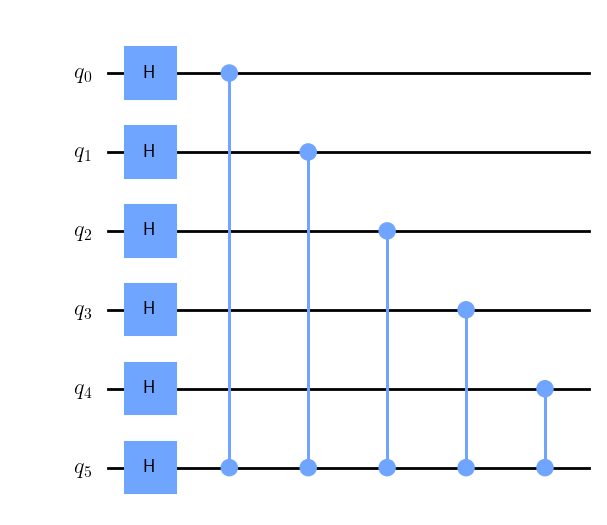

In [ ]:
for i in graph:
    circ.cz(i[0], i[1])

circ.draw('mpl', style='clifford')

In [ ]:
DM=DensityMatrix.from_instruction(circ)
print('Density Matrix')
DM.draw('latex')

Density Matrix


<IPython.core.display.Latex object>

In [ ]:
entropy(DM)

1.28795082258716e-15

In [ ]:
rho_a = partial_trace(state=DM, qargs=[0])
rho_a.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
from sklearn.preprocessing import normalize

x = np.array(rho_a, dtype=float)
norm1 = x / np.linalg.norm(x)
print(x)
norm2 = normalize(x[:,np.newaxis], axis=0).ravel()
print(np.all(norm1 == norm2))

[[ 0.03125  0.03125  0.03125 ...  0.       0.       0.     ]
 [ 0.03125  0.03125  0.03125 ...  0.       0.       0.     ]
 [ 0.03125  0.03125  0.03125 ...  0.       0.       0.     ]
 ...
 [ 0.       0.       0.      ...  0.03125  0.03125 -0.03125]
 [ 0.       0.       0.      ...  0.03125  0.03125 -0.03125]
 [ 0.       0.       0.      ... -0.03125 -0.03125  0.03125]]


c:\Users\me\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\quantum_info\states\densitymatrix.py:115: ComplexWarning:

Casting complex values to real discards the imaginary part



ValueError: Found array with dim 3. the normalize function expected <= 2.

In [ ]:
np.array(rho_a, dtype=float)

c:\Users\me\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\quantum_info\states\densitymatrix.py:115: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(self.data, dtype=dtype)


array([[0.5, 0. ],
       [0. , 0.5]])

In [ ]:
entanglement_of_formation(np.array(rho_a, dtype=float))

QiskitError: 'Input density matrix must be a 2-qubit state.'

In [ ]:
PT=partial_trace(DM,[0])
print('Partial Trace')
PT.draw('latex')

Partial Trace


<IPython.core.display.Latex object>

In [ ]:
# Set the initial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**n)
state.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
# Evolve the state by the quantum circuit
state = state.evolve(circ)

# 'text', 'latex', 'latex_source', 'qsphere', 'hinton', 'bloch', 'city' or 'paulivec'.
state.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
print(f'Entropy for the state is {entropy(state)} while the entropy for rho_a is {entropy(rho_a)}.')

Entropy for the state is 0 while the entropy for rho_a is 1.0000000000000004.


In [ ]:
#Alternative way of representing in latex
array_to_latex(state)

<IPython.core.display.Latex object>

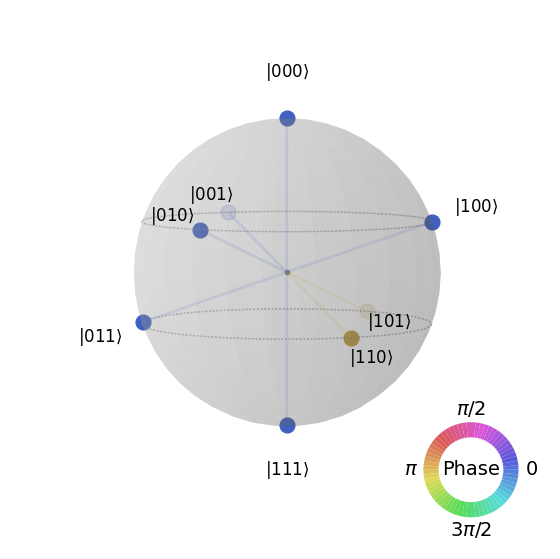

In [ ]:
state.draw('qsphere')

In [ ]:
def calculate_entropy(statevector):
    rho = np.outer(statevector, statevector.conj())
    return entropy(rho, base=2)

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
tqc = transpile(circ, simulator)
result = simulator.run(tqc).result()

MissingOptionalLibraryError: "The 'qiskit-aer' library is required to use 'Aer provider'. You can install it with 'pip install qiskit-aer'."

In [ ]:
# rho_data = [[0.5, 0.3], [0.3, 0.5]]
# density_matrix = DensityMatrix(rho_data)

# Calculate and print the von Neumann entropy
von_neumann_entropy = entropy(state, base=np.e)
print(f"Von Neumann Entropy: {von_neumann_entropy}")

Von Neumann Entropy: 0


In [ ]:
PT=partial_trace(state,[0])
PT.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
egst = [[1/2, 0, 0, -(1/2)], [0, 0, 0, 0], [0, 0, 0, 0], [-(1/2), 0, 0, 1/2]]
partial_trace(egst, [1])

DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))
